# Spread practice
### Quoted Spread, Effective Spread, Realized Spread, Roll's Spread

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Samsung 2017-11-09 transaction data

In [52]:
# Read csv
data = pd.read_csv('2017-11-09_005930.csv', index_col = 0)

# 동시 호가 체결로 인한 데이터 왜곡 방지
data = data[1:]

# Let T = 30 (Rolling period)
T = 30

# Check data structure
print('Index : ', data.index.tolist()[:5],'...\n\nColumns : ', data.columns.tolist()[:11], '... \n\nshape : ', data.shape)

Index :  ['9:00:03', '9:00:03', '9:00:03', '9:00:03', '9:00:03'] ...

Columns :  ['close', 'contrast', 'sellprice', 'buyprice', 'volume', 'cum_vol', 'cum_vol_price', 'open', 'high', 'low', 'contrast_sig'] ... 

shape :  (15871, 21)


### Quoted Spread

${ S }^{ Q } = \frac { 1 }{ T } \sum { ({ A }_{ t }-{ B }_{ t }) } $


In [53]:
data['QS'] = data['sellprice'] - data['buyprice']
data['QS'] = data['QS'].rolling(window = T, min_periods = 1).mean()

### Effective Spread

$ {S}^{E} = \frac { 1 }{T  } 2{Q}_{t}({P}_{t} - {M}_{t}) $

In [54]:
data['mid_t'] = (data['sellprice'] + data['buyprice'])/2
data['ES'] = 2 * np.sign(data['volume']) * (data['close'] - data['mid_t'])
data['ES'] = data['ES'].rolling(window = T, min_periods =1).mean()

### Realized Spread

$ {S}^{R} = \frac{1}{T} \sum {2{Q}_{t}({P}_{t} - {M}_{t+1})}  $

In [55]:
# Realized Spread
data['mid_t_1'] = data['mid_t']
data['mid_t_1'][:-1] = data['mid_t'][1:]
data['RS'] = 2 * np.sign(data['volume']) * (data['close'] - data['mid_t_1'])
data['RS'] = data['RS'].rolling(window = T, min_periods =1).mean() 


C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot three spreads

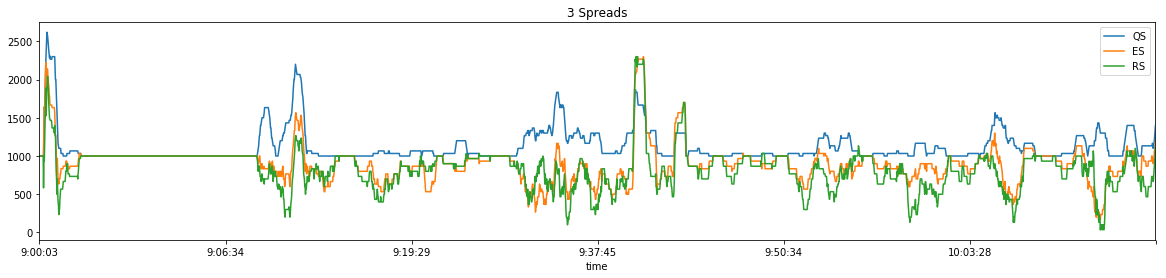

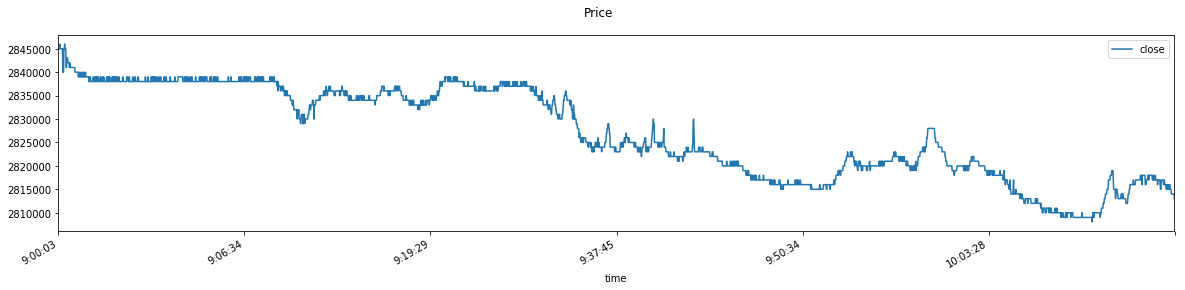

In [63]:
data[['QS','ES','RS']][:3000].plot(figsize=(20,4), legend = True, title='3 Spreads')
data[['close']][:3000].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title = 'Price')

plt.show()

### Roll's Spread
#### Basic and Expanded model

$ {S}_{basic}  \quad =\sqrt { -\frac{Cov\left( \Delta { p }_{ t },\Delta { p }_{ t-1 } \right)} {\alpha \left( 1 -\alpha\right) } } $


$ {S}_{expand}   \quad = \frac{2}{1- \rho}  \sqrt { -Cov\left( \Delta { p }_{ t },\Delta { p }_{ t-1 } \right)} $

In [99]:
T = 300
ALPHA = 0.5
RHO = np.sign(data['volume']).autocorr(lag=1) ; print('AR(1) coefficient of trading signal is ', RHO)

AR(1) coefficient of trading signal is  0.325634110109


#### Calculate ${\Delta p}_{t},{\Delta p}_{t-1} $

In [100]:
data['delta_p_t'] = data['close']
data['delta_p_t'][1:] = data['delta_p_t'][1:].values - data['close'][:-1].values
data['delta_p_t'][0] = 0

data['delta_p_t-1'] = 0
data['delta_p_t-1'][1:] = data['delta_p_t'][:-1]

C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### calculate covariance

In [101]:
data['cov'] = data['delta_p_t-1'].rolling(T, min_periods = 1).cov(data['delta_p_t']).fillna(0)

In [102]:
data['RS_BASIC'] = np.sqrt(-1 * data['delta_p_t'] / (ALPHA *(1-ALPHA)))
data['RS_EXPAND'] = 2 * (1/(1-RHO)) * np.sqrt(-1 * data['delta_p_t'])

C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


#### Plot Roll's spreads

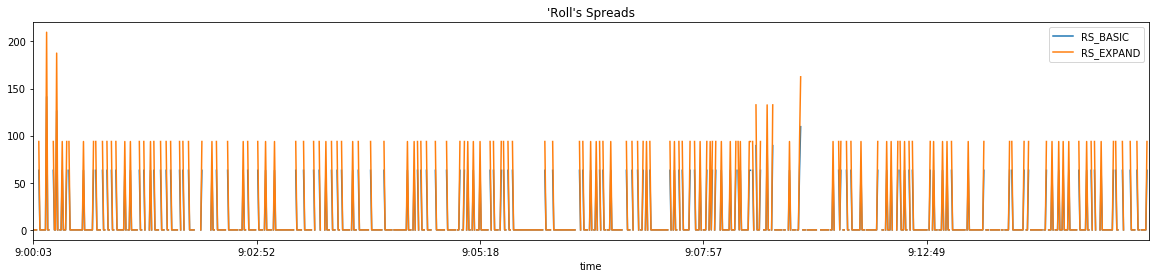

In [103]:
data[['RS_BASIC','RS_EXPAND']][:1000].plot(figsize=(20,4), legend = True, title="'Roll's Spreads")
plt.show()

### Compare Spreads

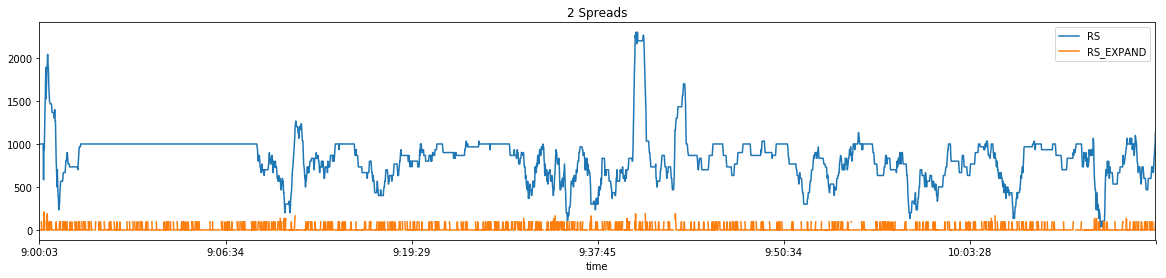

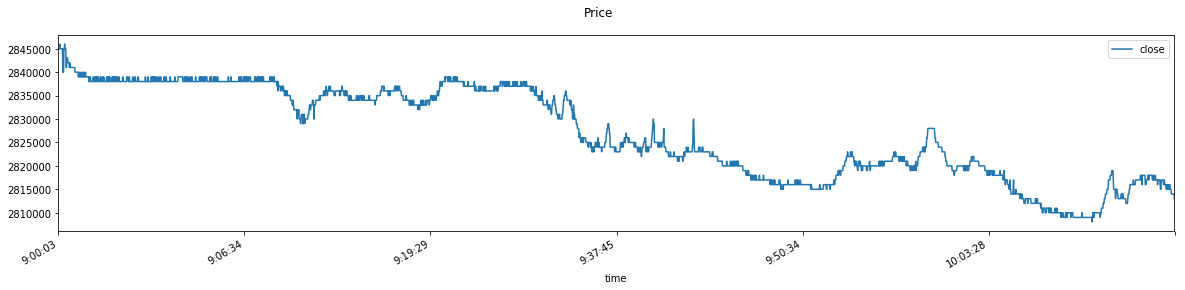

In [104]:
data[['RS','RS_EXPAND']][:3000].plot(figsize=(20,4), legend = True, title='2 Spreads')
data[['close']][:3000].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title = 'Price')

plt.show()